In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
import warnings

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set_context("talk")
warnings.filterwarnings('ignore')

In [9]:
df_origin = pd.read_csv('../anjuke_community_original.csv', encoding='gbk')
df_origin_ppt = df_origin[['average_price','total_construction_area','address','age', 'green_rate','total_houses',
                           'property_fee','parking_space']]
df_origin_ppt.tail()

,average_price,total_construction_area,address,age,green_rate,total_houses,property_fee,parking_space
23706,53406 元/平米,58000m?,［浦东-三林］杨新路281弄1-49号,2001年,40%(高),860户,0.70元/平米/月,480
23707,76114 元/平米,15000m?,［徐汇-龙华］沪闵路9669弄,2002年,30%(一般),144户,暂无数据,32
23708,62094 元/平米,9800m?,［长宁-仙霞］仙霞路430弄,1985年,暂无数据,860户,1.20元/平米/月,150
23709,34123 元/平米,40000m?,［松江-松江新城］谷阳北路900弄1-150号,1999年,30%(一般),500户,0.90元/平米/月,198
23710,56660 元/平米,508500m?,［闵行-古美罗阳］古美西路420弄,1996年,40%(高),560户,0.45元/平米/月,130


In [11]:
df_clean1 = pd.read_csv('anjuke_community_process1.csv', encoding='gbk')
df_clean1.head()

,community_id,community_name,url,district,township,address,longitude,latitude,age,developer,...,level_comm_num,school_score,nursery_num,junior_num,middle_num,commerce_score,restaurant_num,bank_num,supermarket_num,average_price
0,1,莲园小区,https://shanghai.anjuke.com/community/view/1/,浦东,北蔡,莲园路518弄,31.192010,121.564892,1996.0,上海吉松物业管理公司,...,237.0,7.0,5.0,3.0,2.0,5.0,306.0,54.0,128.0,57483.0
1,100,碧云国际社区晓园,https://shanghai.anjuke.com/community/view/100/,浦东,碧云,红枫路358弄,31.247488,121.598943,2006.0,上海中通贵云实业有限公司,...,0.0,5.0,4.0,1.0,2.0,6.0,189.0,24.0,35.0,84345.0
2,1000,闵行水仙苑,https://shanghai.anjuke.com/community/view/1000/,闵行,春申,畹町路500弄,31.111473,121.406853,1998.0,上海新闵房地产联合有限公司,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57626.0
3,10000,虹桥向日葵公寓,https://shanghai.anjuke.com/community/view/10000/,长宁,中山公园,中山西路669弄,31.217635,121.420373,1996.0,长辉房地产有限公司,...,0.0,9.0,0.0,0.0,0.0,7.0,161.0,151.0,188.0,66057.0
4,1002,仙霞路486弄,https://shanghai.anjuke.com/community/view/1002/,长宁,仙霞,仙霞路486弄,31.211309,121.398806,1994.0,上海新长宁（集团）有限公司,...,0.0,8.0,0.0,0.0,0.0,10.0,0.0,98.0,97.0,51321.0


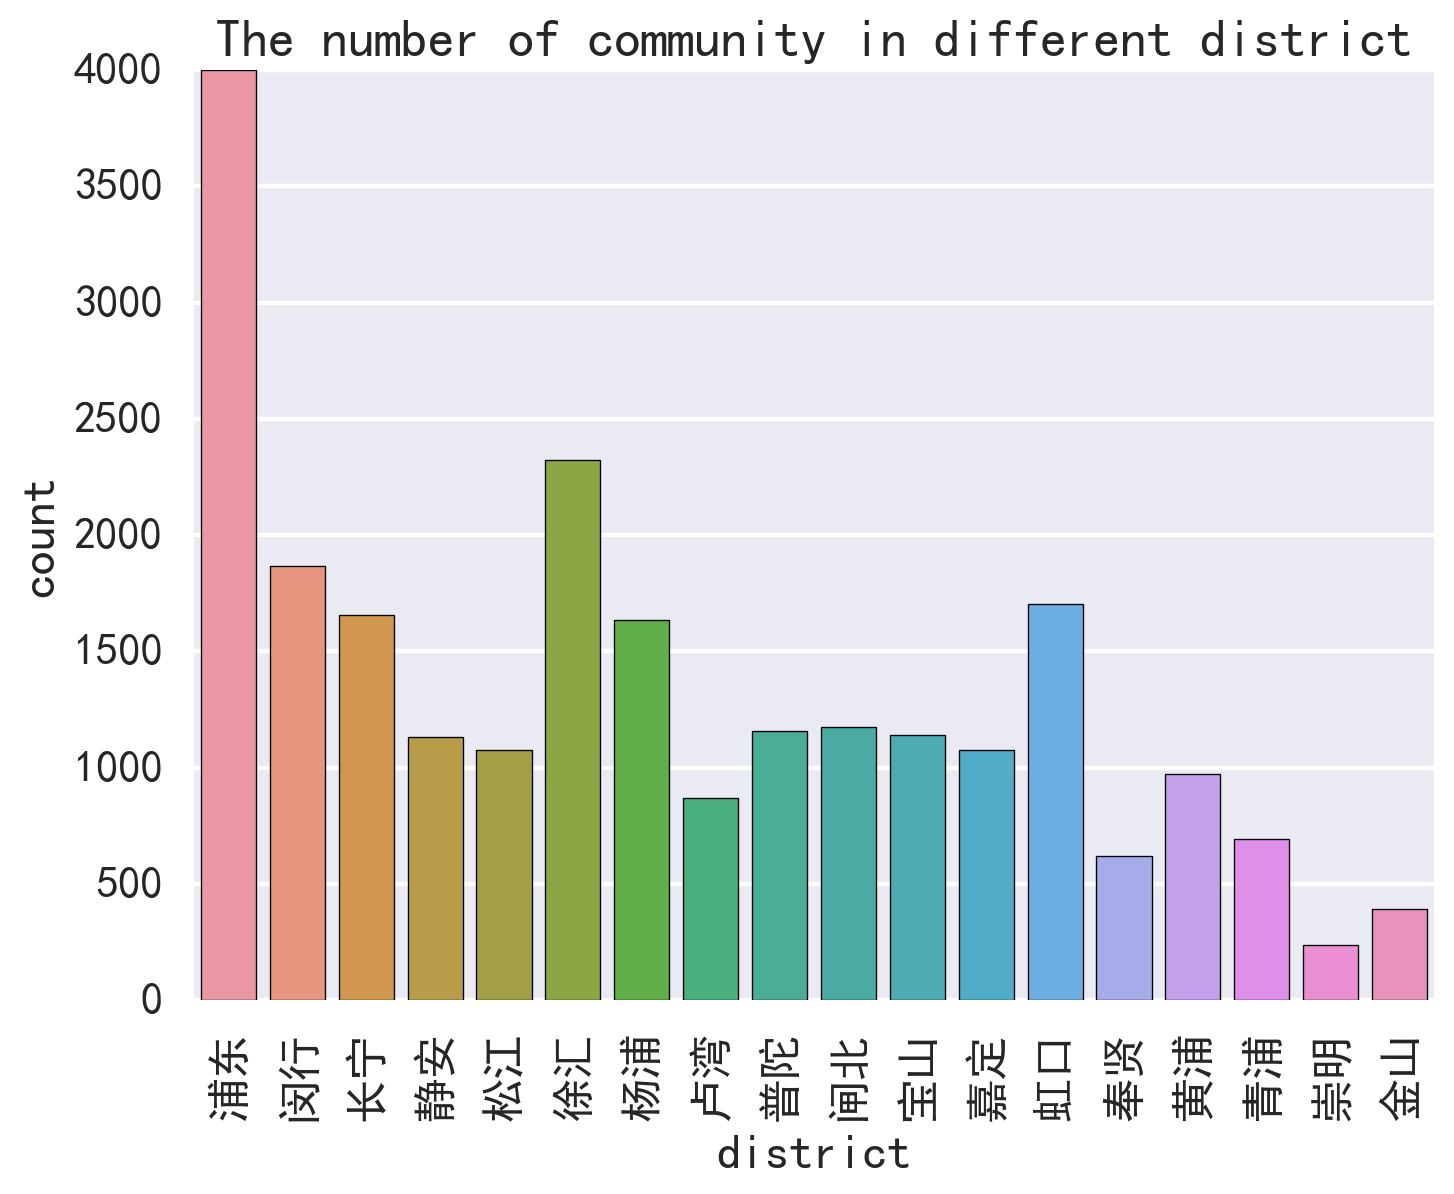

In [41]:
# 各个区小区数量
plt.figure(figsize=(8, 6))
sns.countplot(x='district', data=df_clean1)
plt.xticks(rotation=90)
plt.title('The number of community in different district')

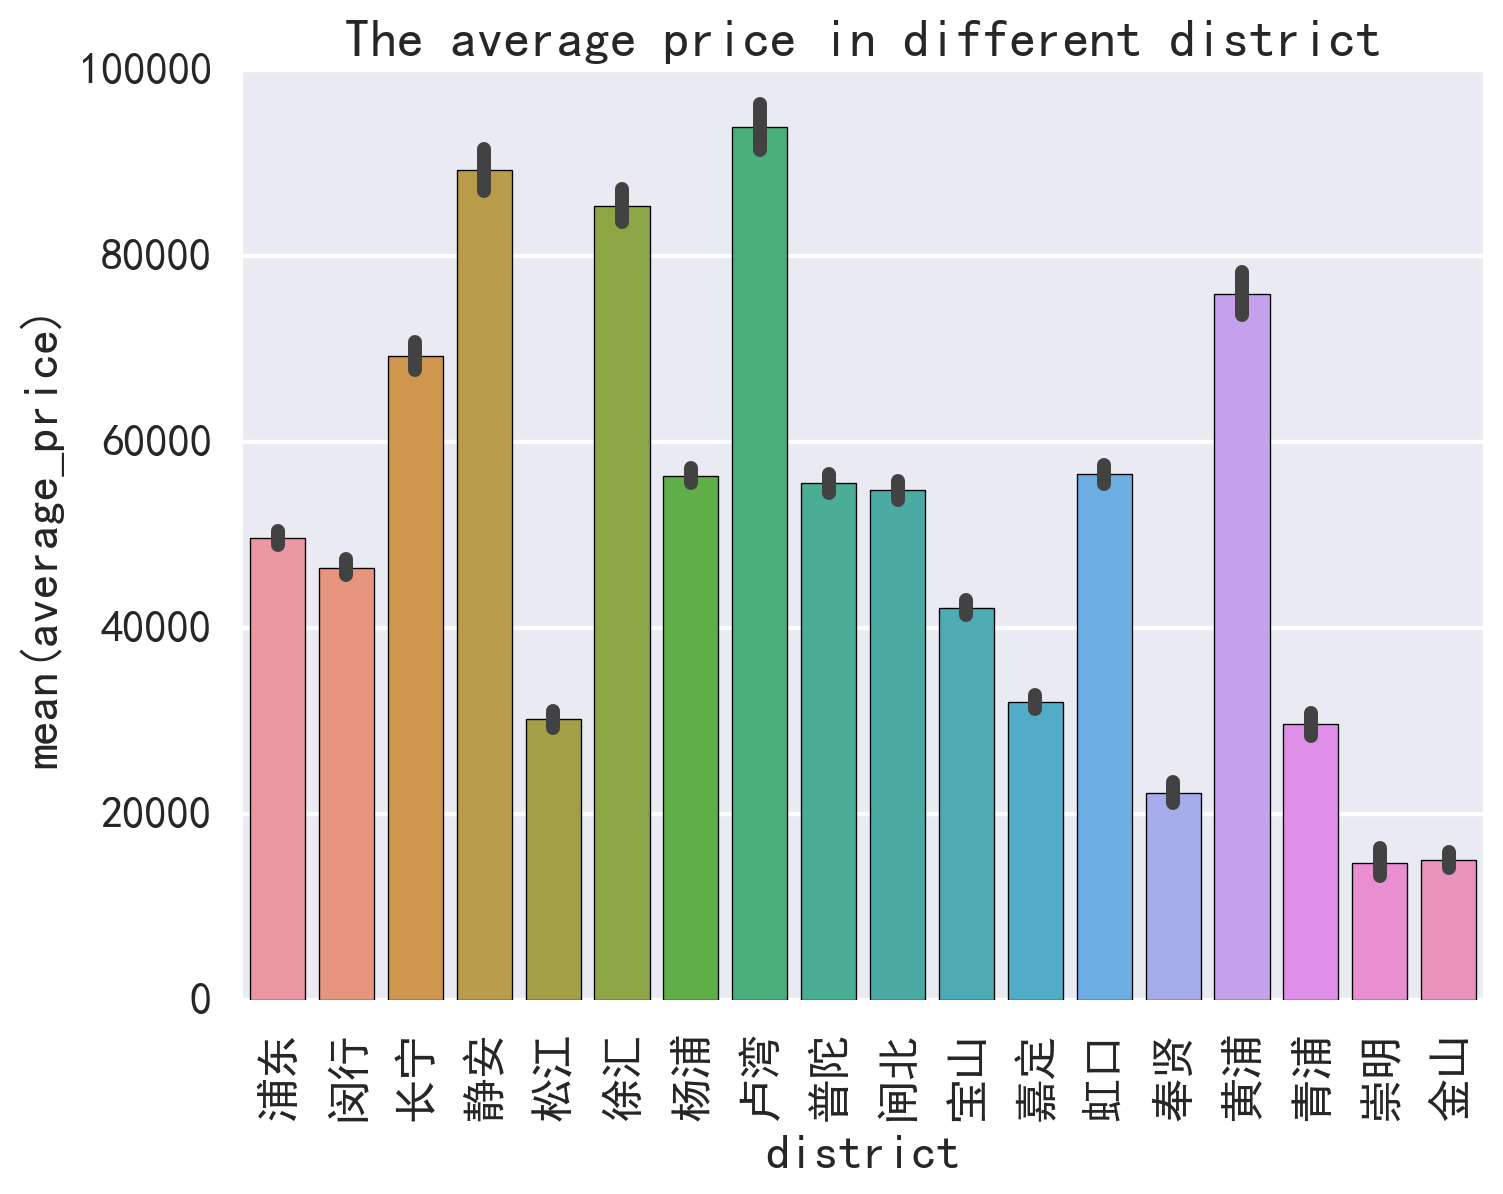

In [45]:
# 各个区均价
plt.figure(figsize=(8, 6))
sns.barplot(x='district', y='average_price', data=df_clean1, estimator=np.mean)
plt.xticks(rotation=90)
plt.title('The average price in different district')

In [21]:
total = df_clean1.isnull().sum().sort_values(ascending=False)
percent = (df_clean1.isnull().sum()/df_clean1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
total_construction_area,11878,0.500949
total_houses,11682,0.492683
parking_space,11025,0.464974
supermarket_num,9828,0.414491
greet,9828,0.414491
comfort,9828,0.414491
traffic_score,9828,0.414491
metro_station_num,9828,0.414491
bus_station_num,9828,0.414491
level_three_num,9828,0.414491


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

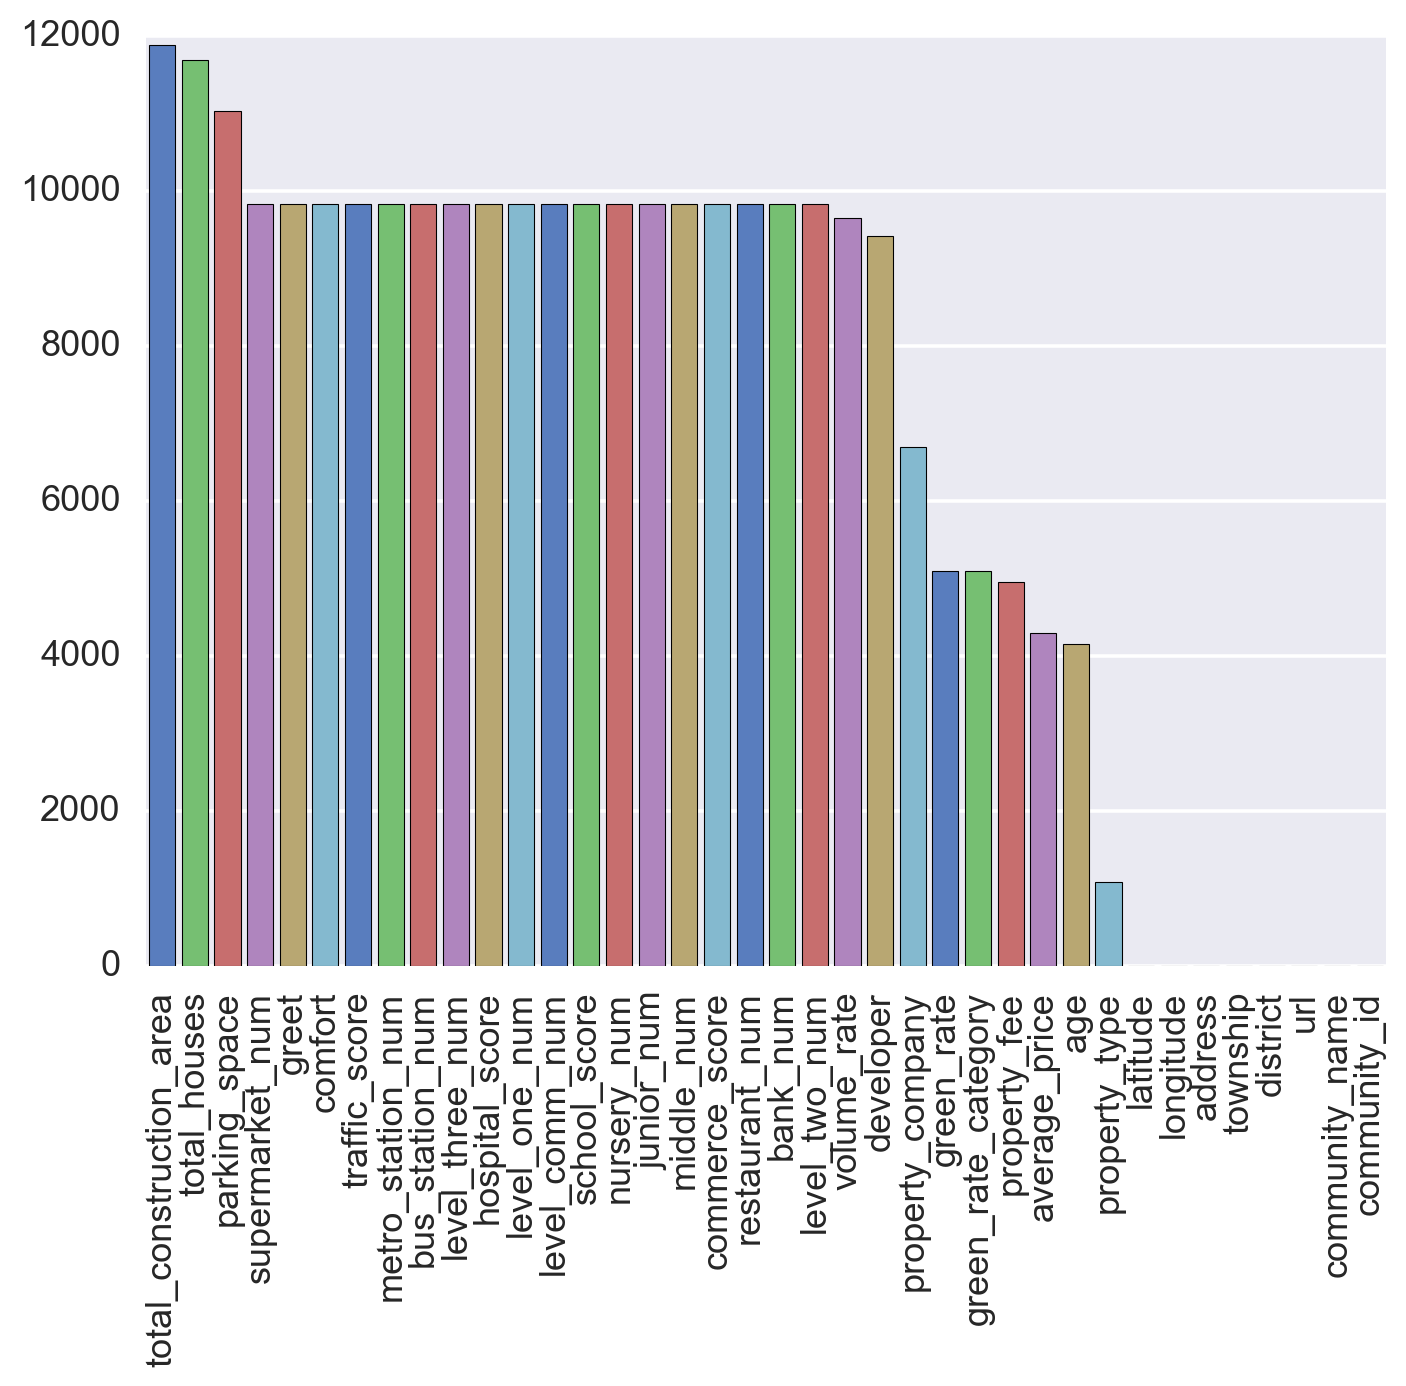

In [20]:
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
sns.barplot(x=missing_data.index, y=missing_data['Total'].values,palette='muted')
plt.xticks(rotation=90)

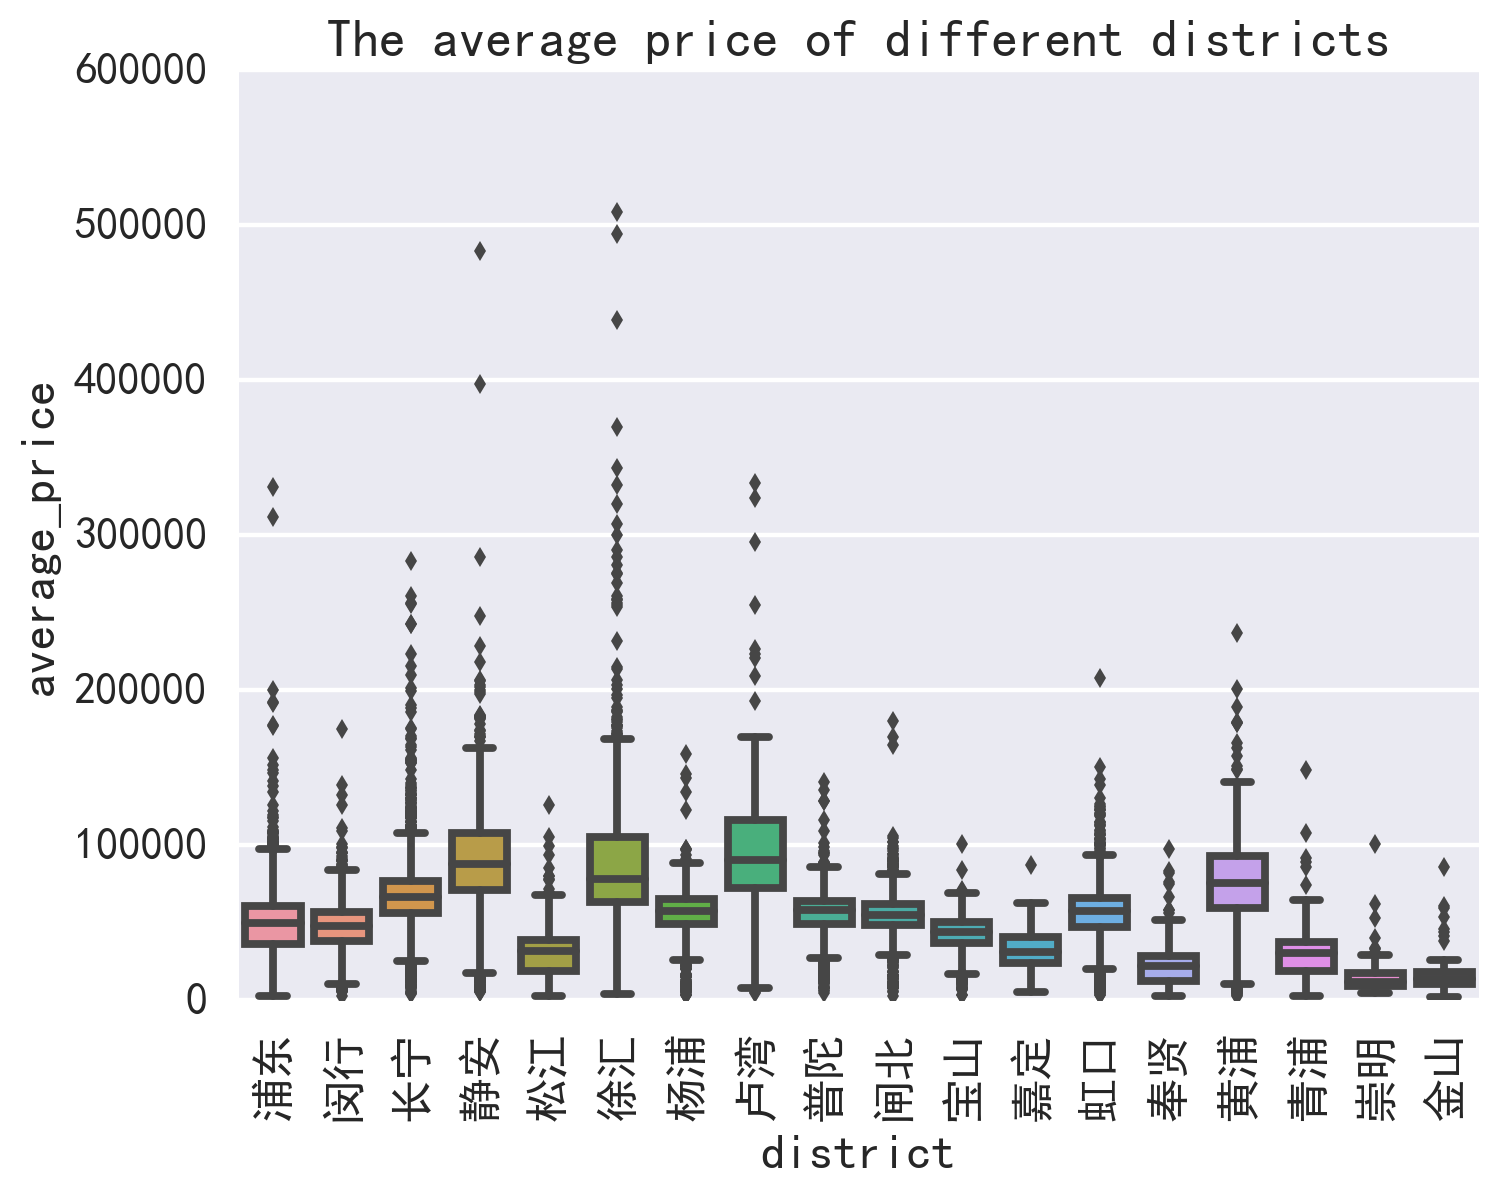

In [27]:
plt.figure(figsize=(8, 6))
sns.set_context("poster")
sns.boxplot(x='district', y='average_price', data=df_clean1)
plt.xticks(rotation=90)
plt.title('The average price of different districts')

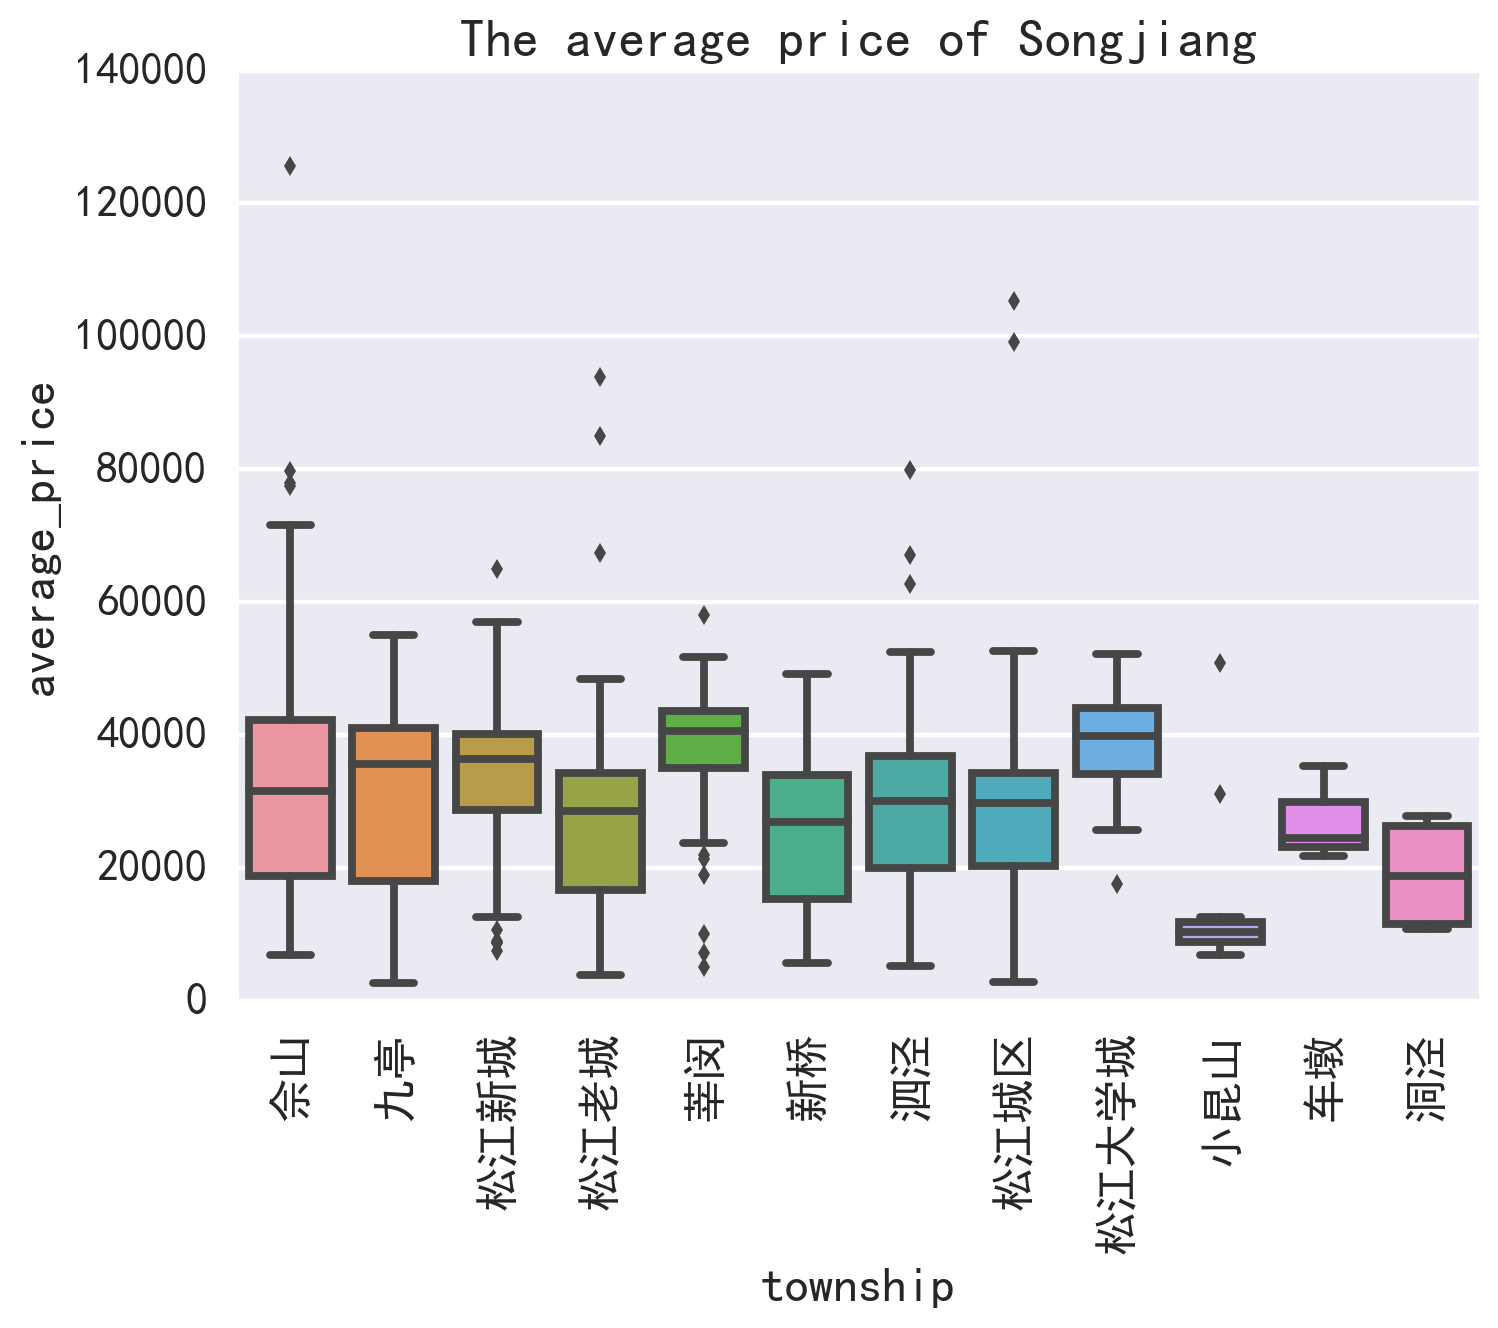

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='township', y='average_price', data=df_clean1[df_clean1['district'] == '松江'])
plt.xticks(rotation=90)
plt.title('The average price of Songjiang')

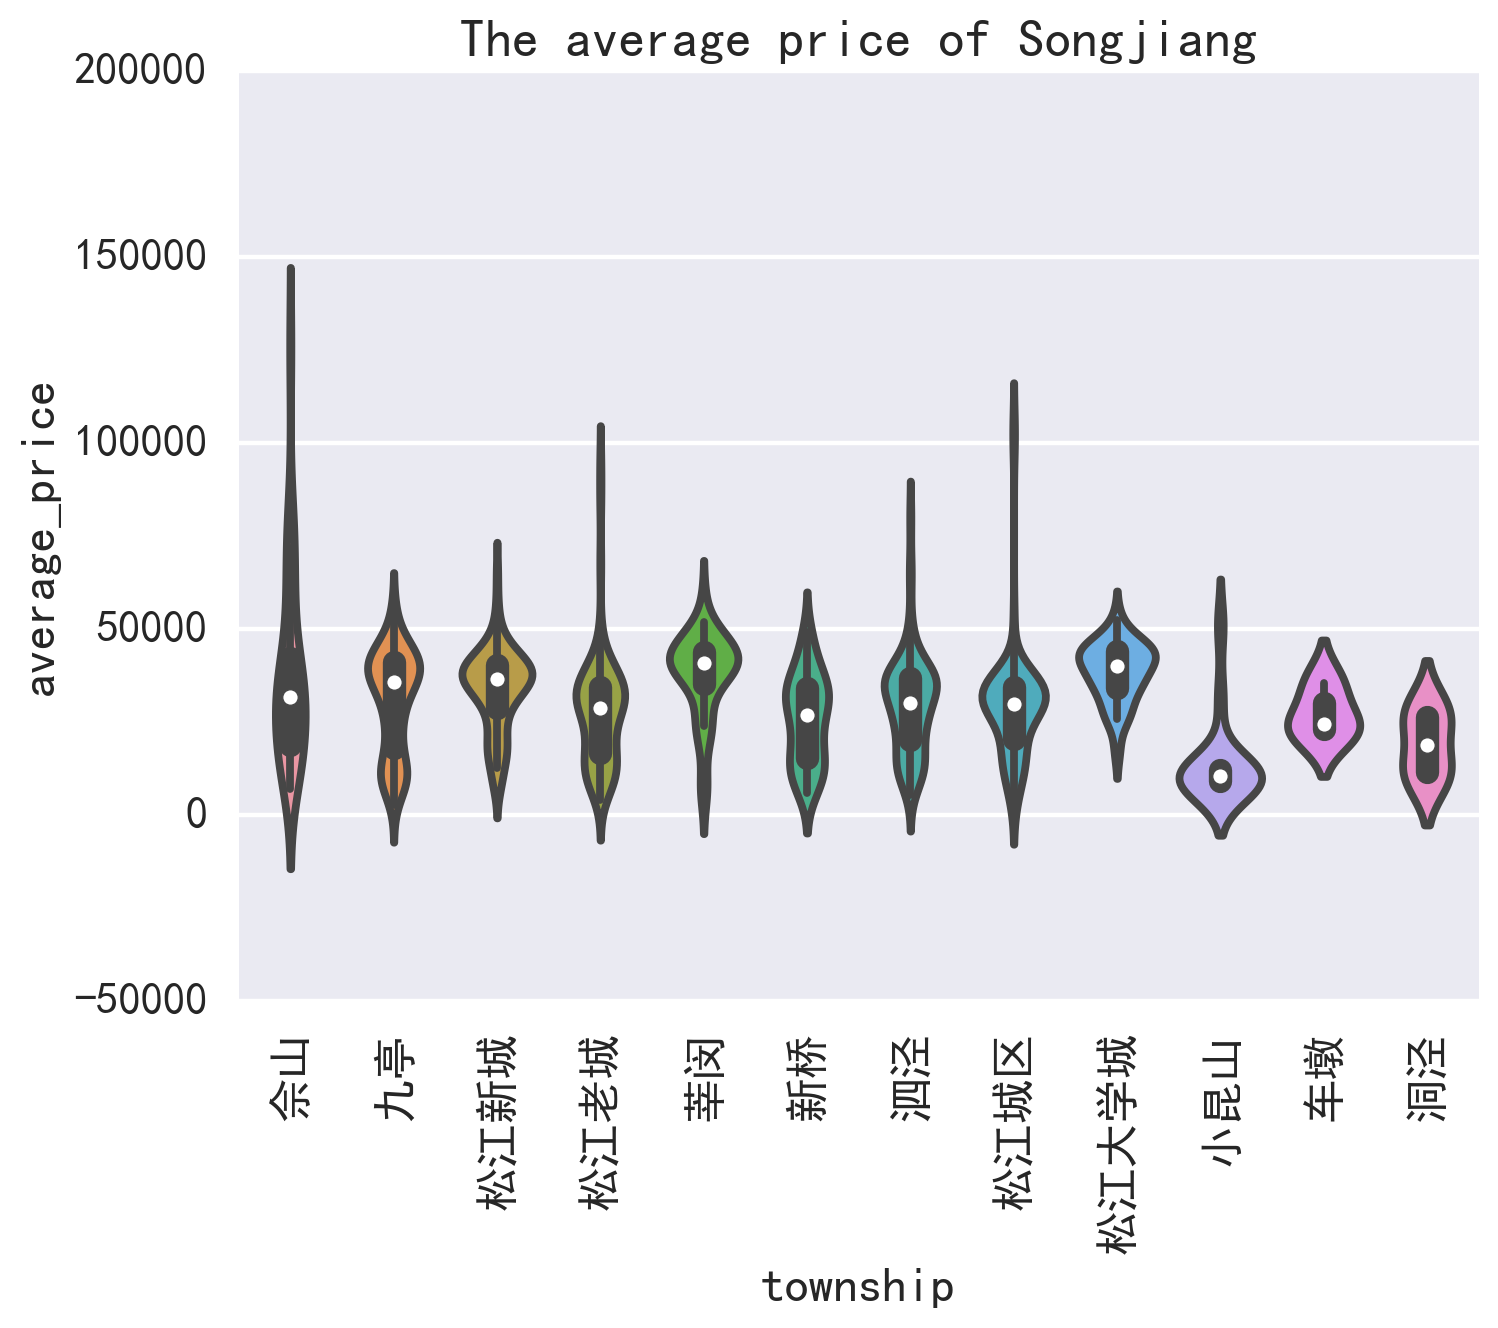

In [33]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='township', y='average_price', data=df_clean1[df_clean1['district'] == '松江'])
plt.xticks(rotation=90)
plt.title('The average price of Songjiang')

In [44]:
df_clean2 = pd.read_csv('anjuke_community_process2.csv', encoding='gbk')
df_clean2.describe()

,community_id,longitude,latitude,age,property_fee,total_construction_area,volume_rate,total_houses,parking_space,green_rate,...,level_comm_num,school_score,nursery_num,junior_num,middle_num,commerce_score,restaurant_num,bank_num,supermarket_num,average_price
count,17776.000000,17776.000000,17776.000000,17776.000000,17776.000000,1.777600e+04,17776.000000,17776.000000,1.777600e+04,17776.000000,...,17776.000000,17776.000000,17776.000000,17776.000000,17776.000000,17776.000000,17776.000000,17776.000000,17776.000000,17776.000000
mean,179695.661735,31.211316,121.451828,1997.123706,1.345404,1.659834e+05,1.825963,642.588940,2.859705e+02,33.916770,...,184.761307,5.111245,1.868193,1.030969,0.740549,6.726119,160.625113,54.386082,70.602835,56554.645140
std,237501.297683,0.177920,0.315238,13.011942,1.829523,7.020051e+06,0.651906,3916.356367,8.382861e+03,7.491674,...,198.785289,3.410782,3.125533,2.181442,1.616527,2.656207,114.458936,57.721615,65.028408,26703.580038
min,1.000000,23.750356,97.872173,1900.000000,0.000000,1.000000e+03,0.010000,1.000000,0.000000e+00,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2200.000000
25%,5882.750000,31.179286,121.413601,1994.000000,0.600000,1.650000e+04,1.500000,230.000000,8.000000e+01,30.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,6.000000,55.000000,10.000000,11.000000,39555.750000
50%,62778.000000,31.224314,121.462611,1999.000000,0.925000,3.390000e+04,1.800000,400.000000,1.460000e+02,35.000000,...,97.500000,6.000000,0.000000,0.000000,0.000000,7.000000,177.000000,38.000000,57.000000,54764.000000
75%,287036.250000,31.272716,121.512788,2004.000000,1.500000,6.079700e+04,2.000000,620.000000,2.300000e+02,38.000000,...,449.000000,8.000000,3.000000,1.000000,1.000000,8.500000,248.000000,79.000000,115.000000,69334.000000
max,821351.000000,39.109800,121.926870,2018.000000,40.000000,6.730500e+08,8.900000,300000.000000,1.111111e+06,90.000000,...,486.000000,10.000000,20.000000,22.000000,14.000000,10.000000,500.000000,348.000000,307.000000,181599.000000


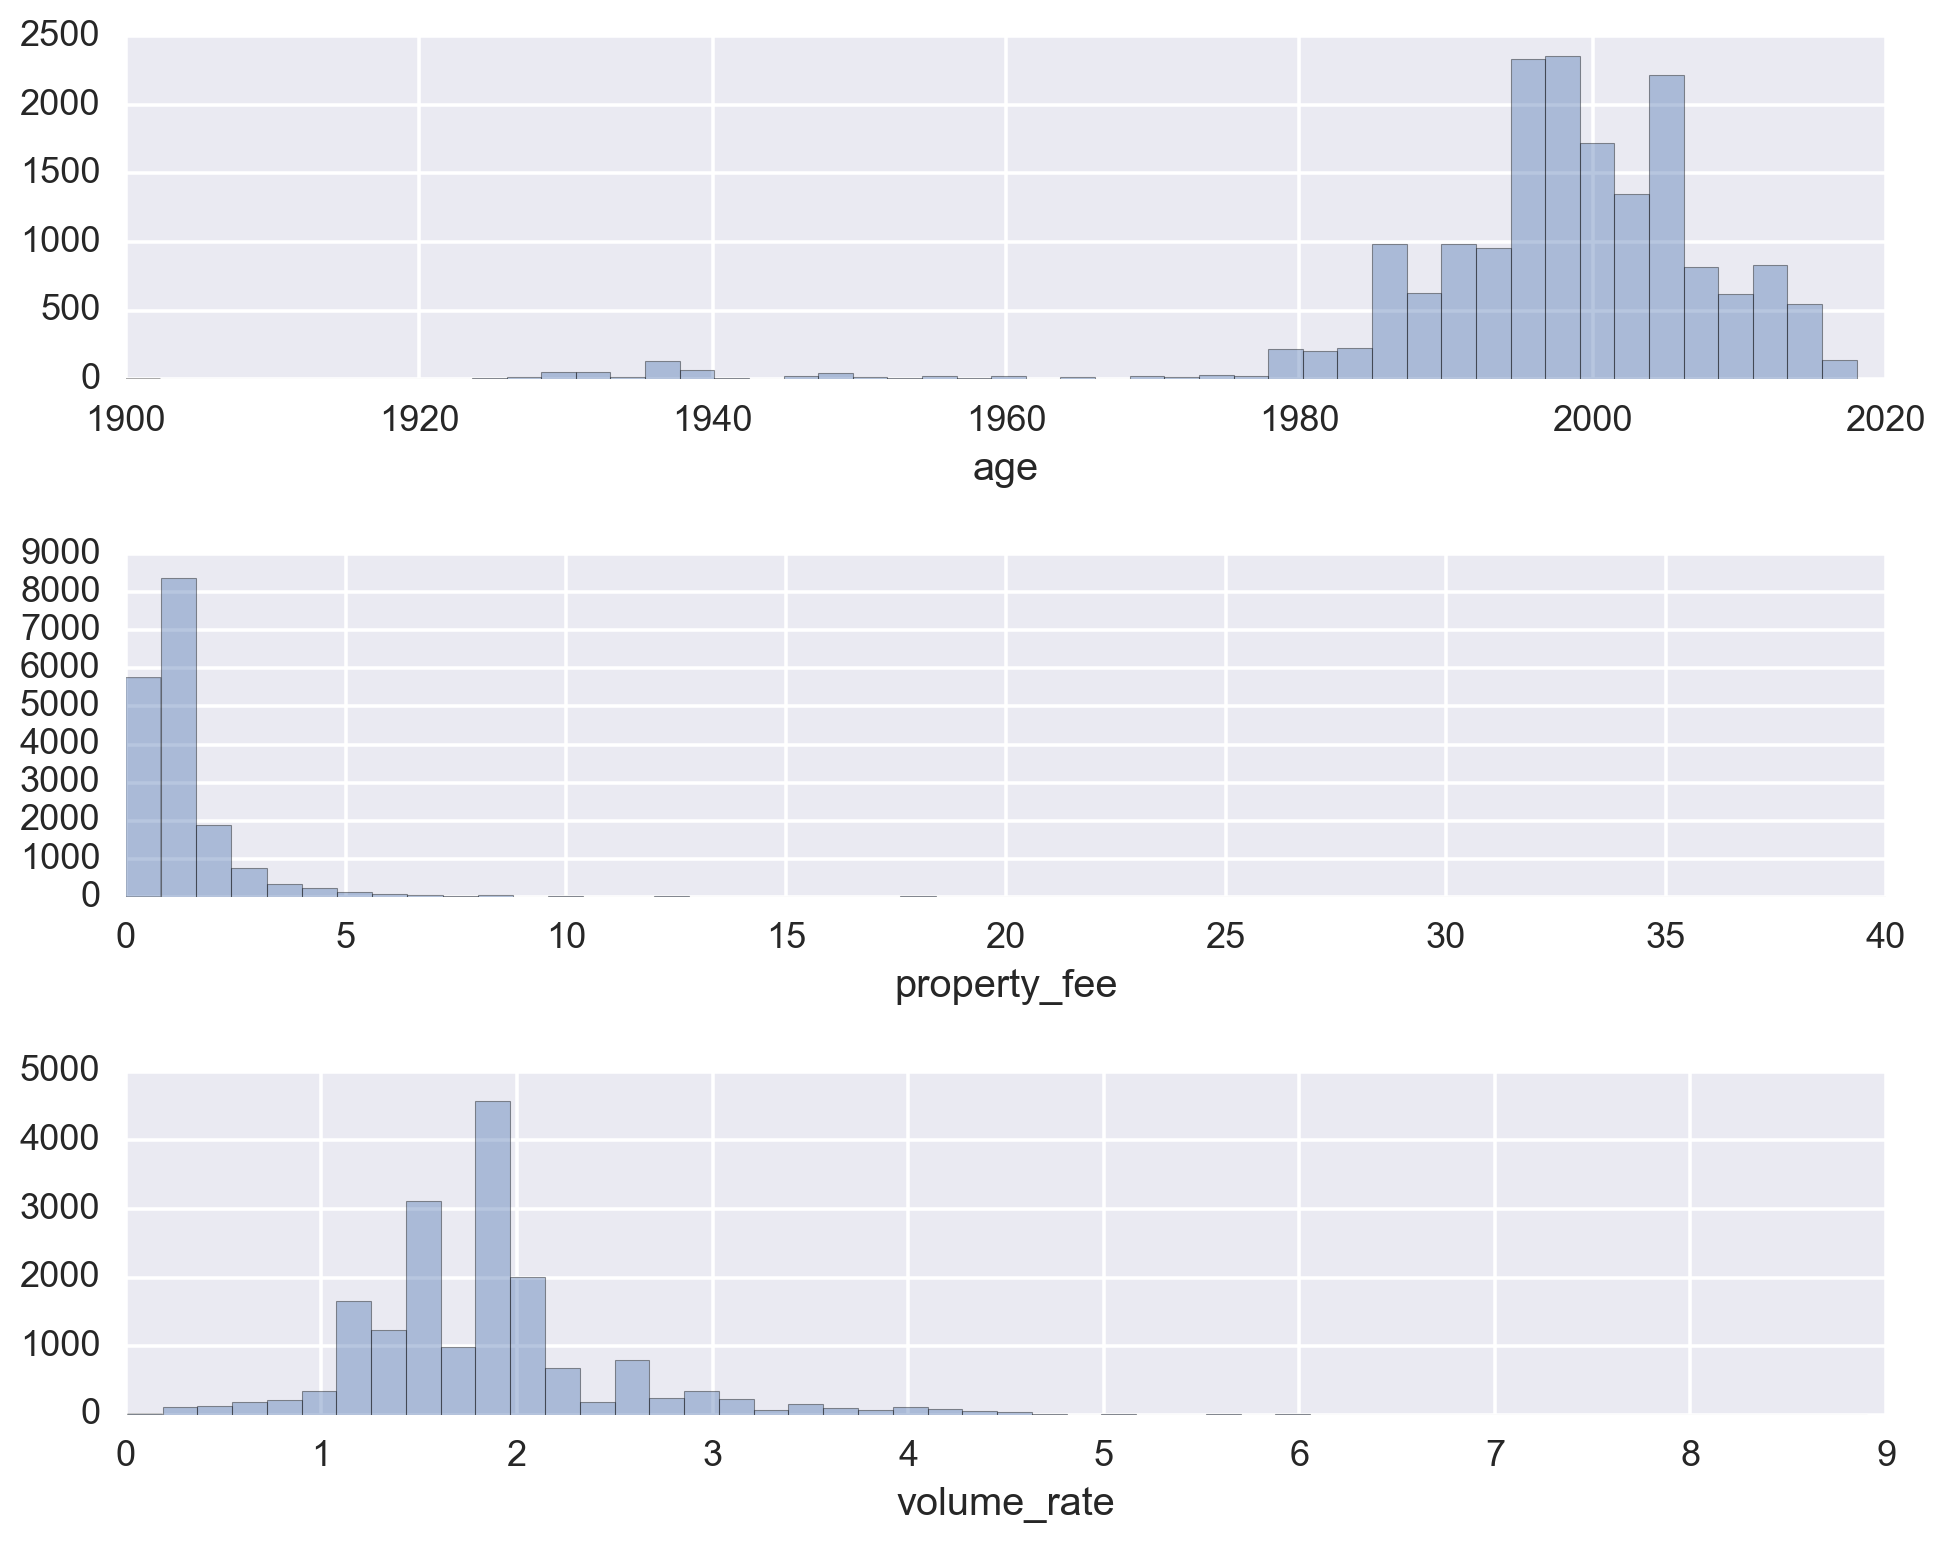

In [53]:
fig, ax = plt.subplots(3, 1, figsize = (10, 8))
sns.distplot(df_clean2['age'], kde=False, ax = ax[0])
sns.distplot(df_clean2['property_fee'], kde=False, ax = ax[1])
sns.distplot(df_clean2['volume_rate'], kde=False, ax = ax[2])
plt.tight_layout()

* 年代小于1980的记录全部删除
* 年代大于2017的全部删除
* 物业费为0的记录全部删除
* 物业费大于5的记录全部删除

In [54]:
df1 = df_clean2.drop(df_clean2[df_clean2['age'] < 1980].index)
print('年代小于1980的记录过滤掉：', df_clean2.shape[0] - df1.shape[0]) 
df2 = df1.drop(df1[df1['age'] > 2017].index)
print('年代大于2017的记录过滤掉：', df1.shape[0] - df2.shape[0])

年代小于1980的记录过滤掉： 724
年代大于2017的记录过滤掉： 1


In [59]:
df3 = df2.drop(df2[df2['property_fee'] == 0].index)
print('物业费为0的记录过滤掉：', df2.shape[0] - df3.shape[0]) 
df4 = df3.drop(df3[df3['property_fee'] > 10].index)
print('物业费大于5的记录过滤掉：', df3.shape[0] - df4.shape[0]) 

物业费为0的记录过滤掉： 206
物业费大于5的记录过滤掉： 91


# 房价过低的过滤掉

In [72]:
# 市区价格低于30000的过滤掉
# 郊区低于10000的过滤掉
df4['district'].unique()

array(['浦东', '闵行', '长宁', '静安', '松江', '徐汇', '杨浦', '卢湾', '普陀', '闸北', '宝山',
       '嘉定', '虹口', '奉贤', '黄浦', '青浦', '崇明', '金山'], dtype=object)

In [78]:
df5 = df4.drop(df4[df4['average_price'] < 15000].index)
print('房价低于10000的记录过滤掉：', df4.shape[0] - df5.shape[0]) 

房价低于10000的记录过滤掉： 868


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

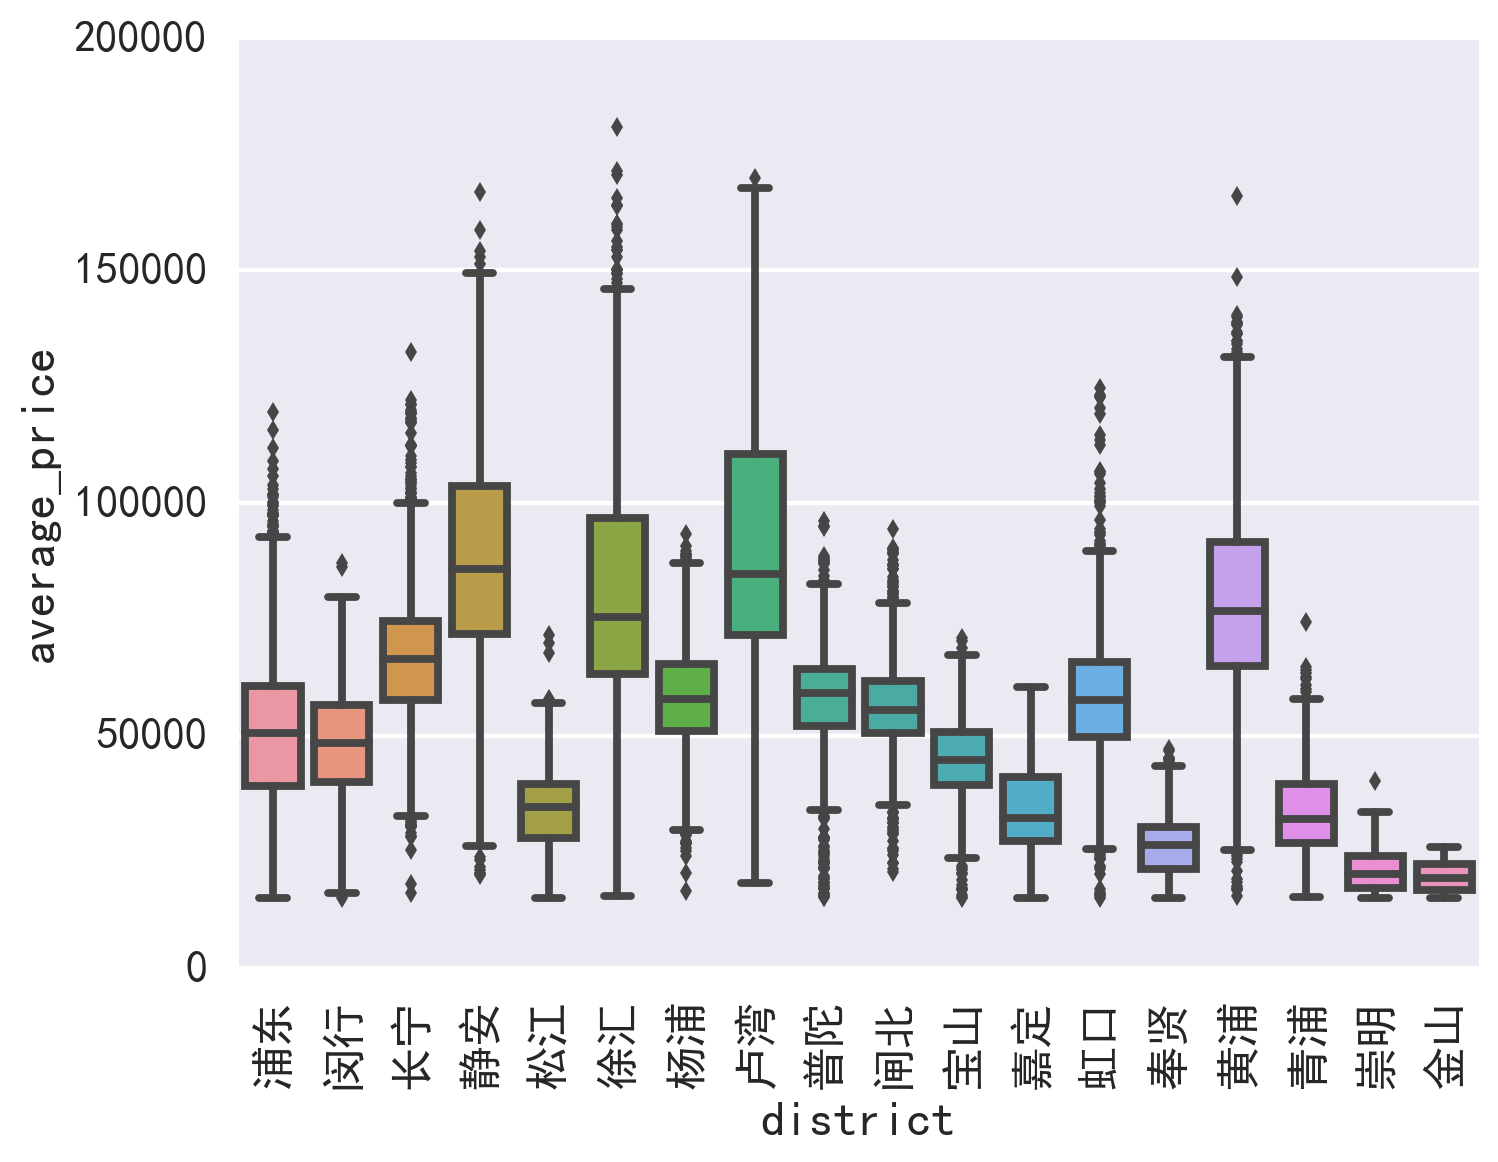

In [80]:
plt.figure(figsize=(8, 6))
sns.set_context('poster')
sns.boxplot(x='district', y='average_price', data=df5)
plt.xticks(rotation=90)

# 相关性分析

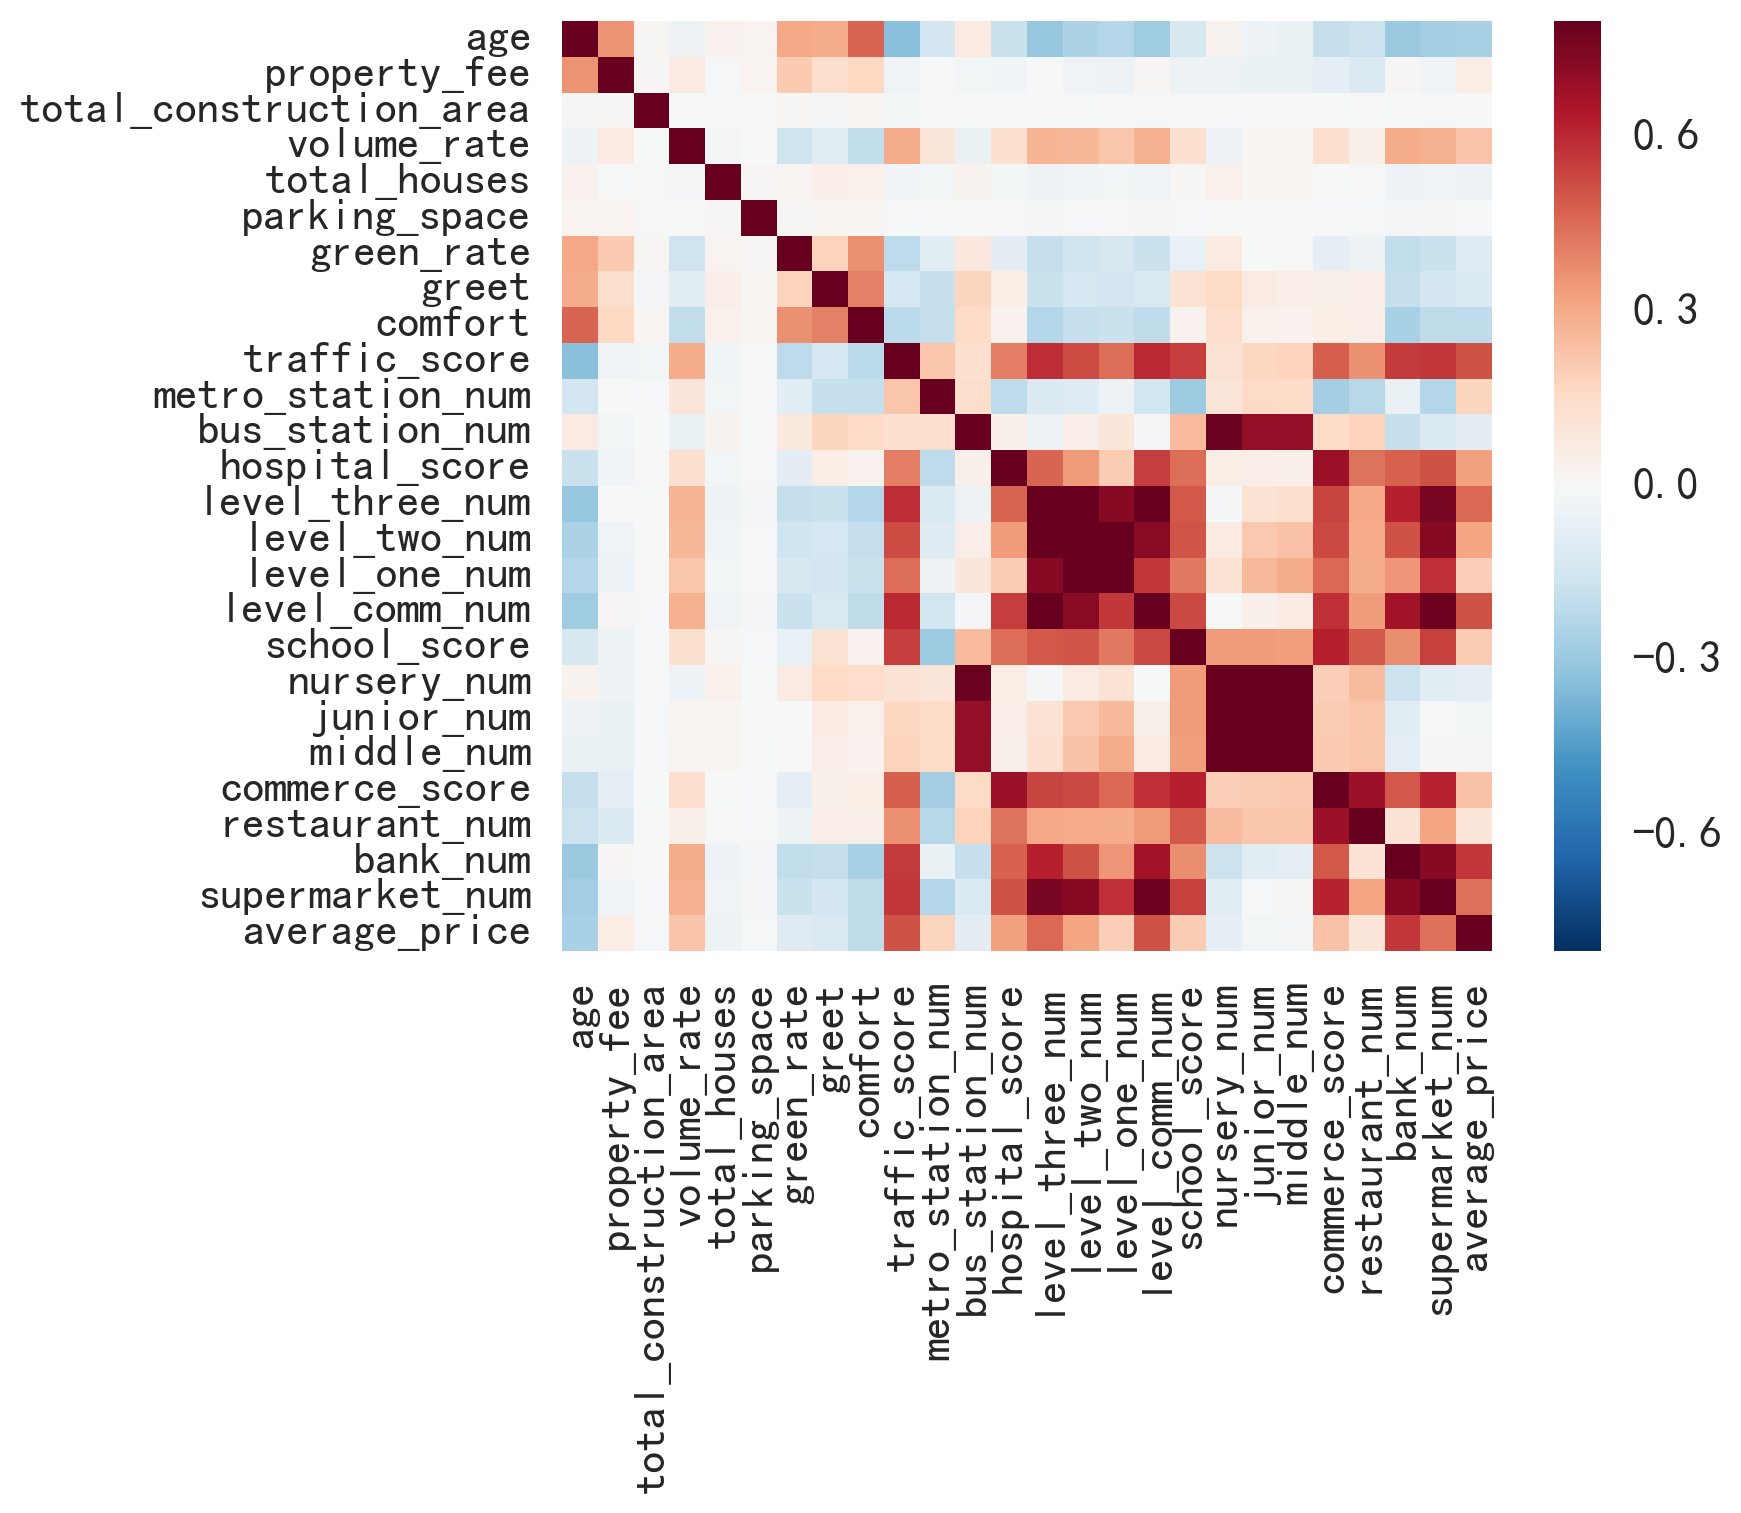

In [82]:
corrmat = df5.select_dtypes(include=['float64', 'int64']).iloc[:, 3:].corr()  # 过滤掉community_id、longitude、latitude
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat, vmax=.8, square=True)

In [83]:
cor_dict = corrmat['average_price'].to_dict()
del cor_dict['average_price']
print("List the numerical features decendingly by their correlation with Sale Price:\n")
for ele in sorted(cor_dict.items(), key=lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Sale Price:

bank_num: 	0.5639801549673229
traffic_score: 	0.5115363777395932
level_comm_num: 	0.5076726454018087
level_three_num: 	0.46237483280197417
supermarket_num: 	0.44340172641322234
hospital_score: 	0.3300225893849061
level_two_num: 	0.31448594572866656
age: 	-0.26052143044331716
commerce_score: 	0.23128537326765375
volume_rate: 	0.23114103444523615
comfort: 	-0.20334232741697952
school_score: 	0.2026286800353588
level_one_num: 	0.19682280868397883
metro_station_num: 	0.1800572863102367
greet: 	-0.11936355966331275
restaurant_num: 	0.10330921719056672
green_rate: 	-0.10094300864185712
bus_station_num: 	-0.08570960950761773
nursery_num: 	-0.07502854849317449
property_fee: 	0.05709813348463019
total_houses: 	-0.042180752775098716
junior_num: 	-0.02335910767981396
middle_num: 	-0.016210691078794814
total_construction_area: 	-0.01049082482180193
parking_space: 	-0.00749830406021361


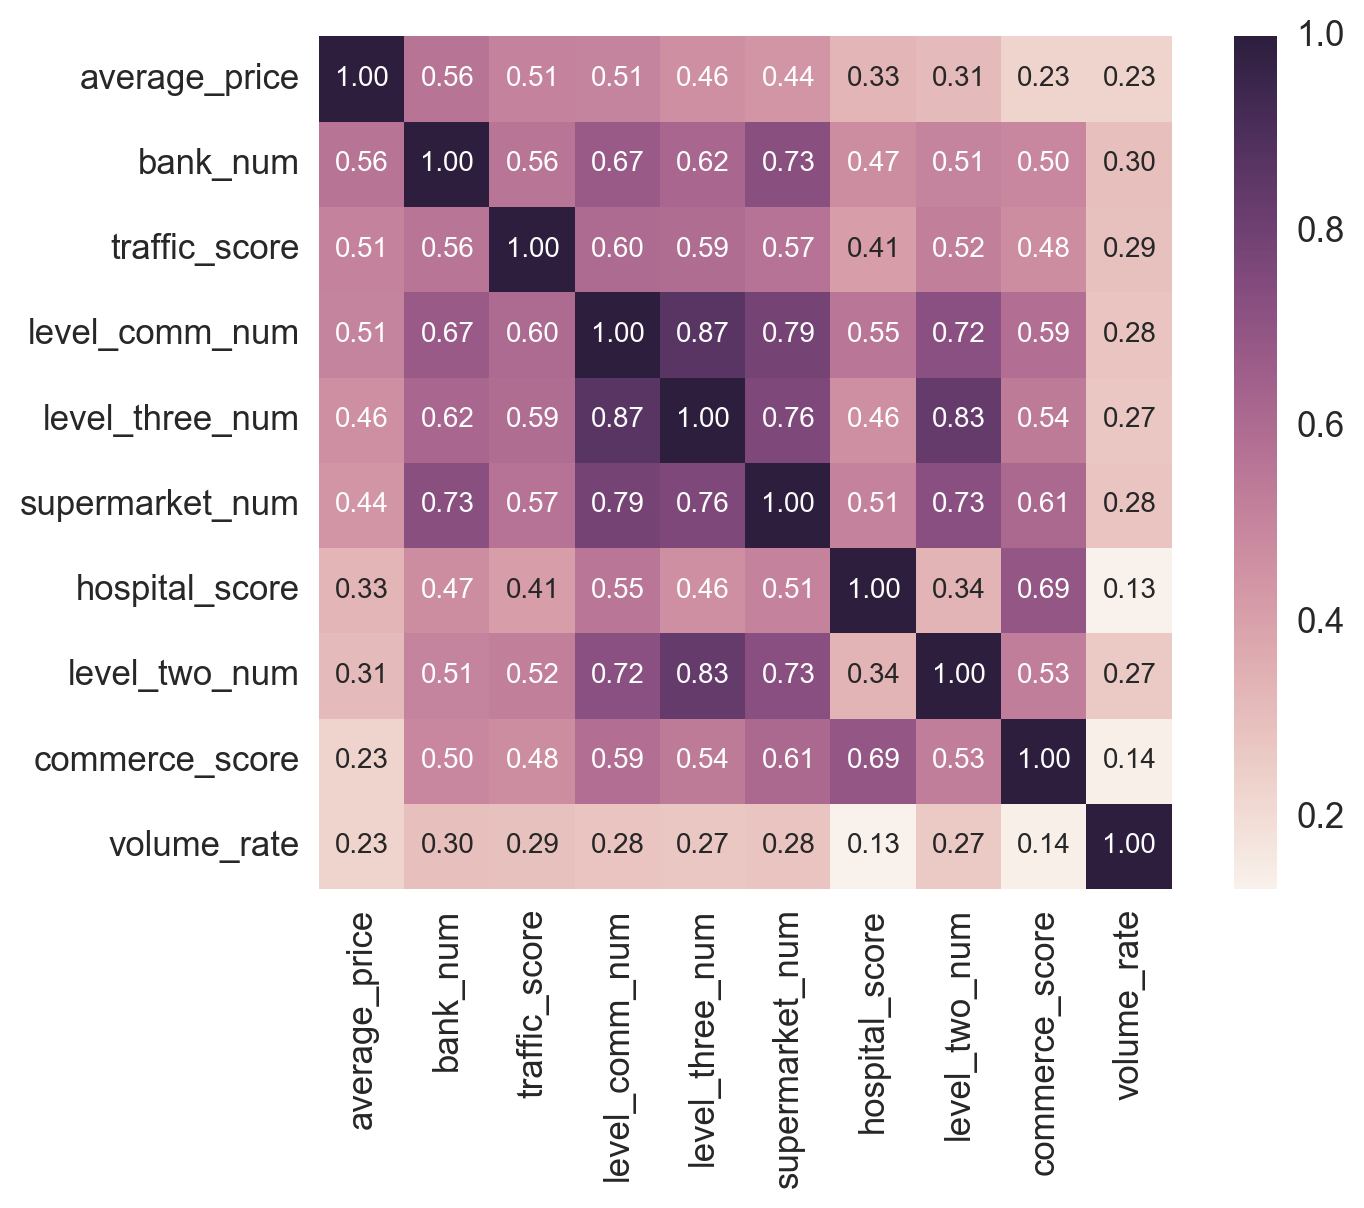

In [88]:
k = 10  # number of variables for heatmap
cols = corrmat.nlargest(k, 'average_price')['average_price'].index
cm = np.corrcoef(df5[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                     xticklabels=cols.values)

# 房屋价值与房屋建造时间的关系

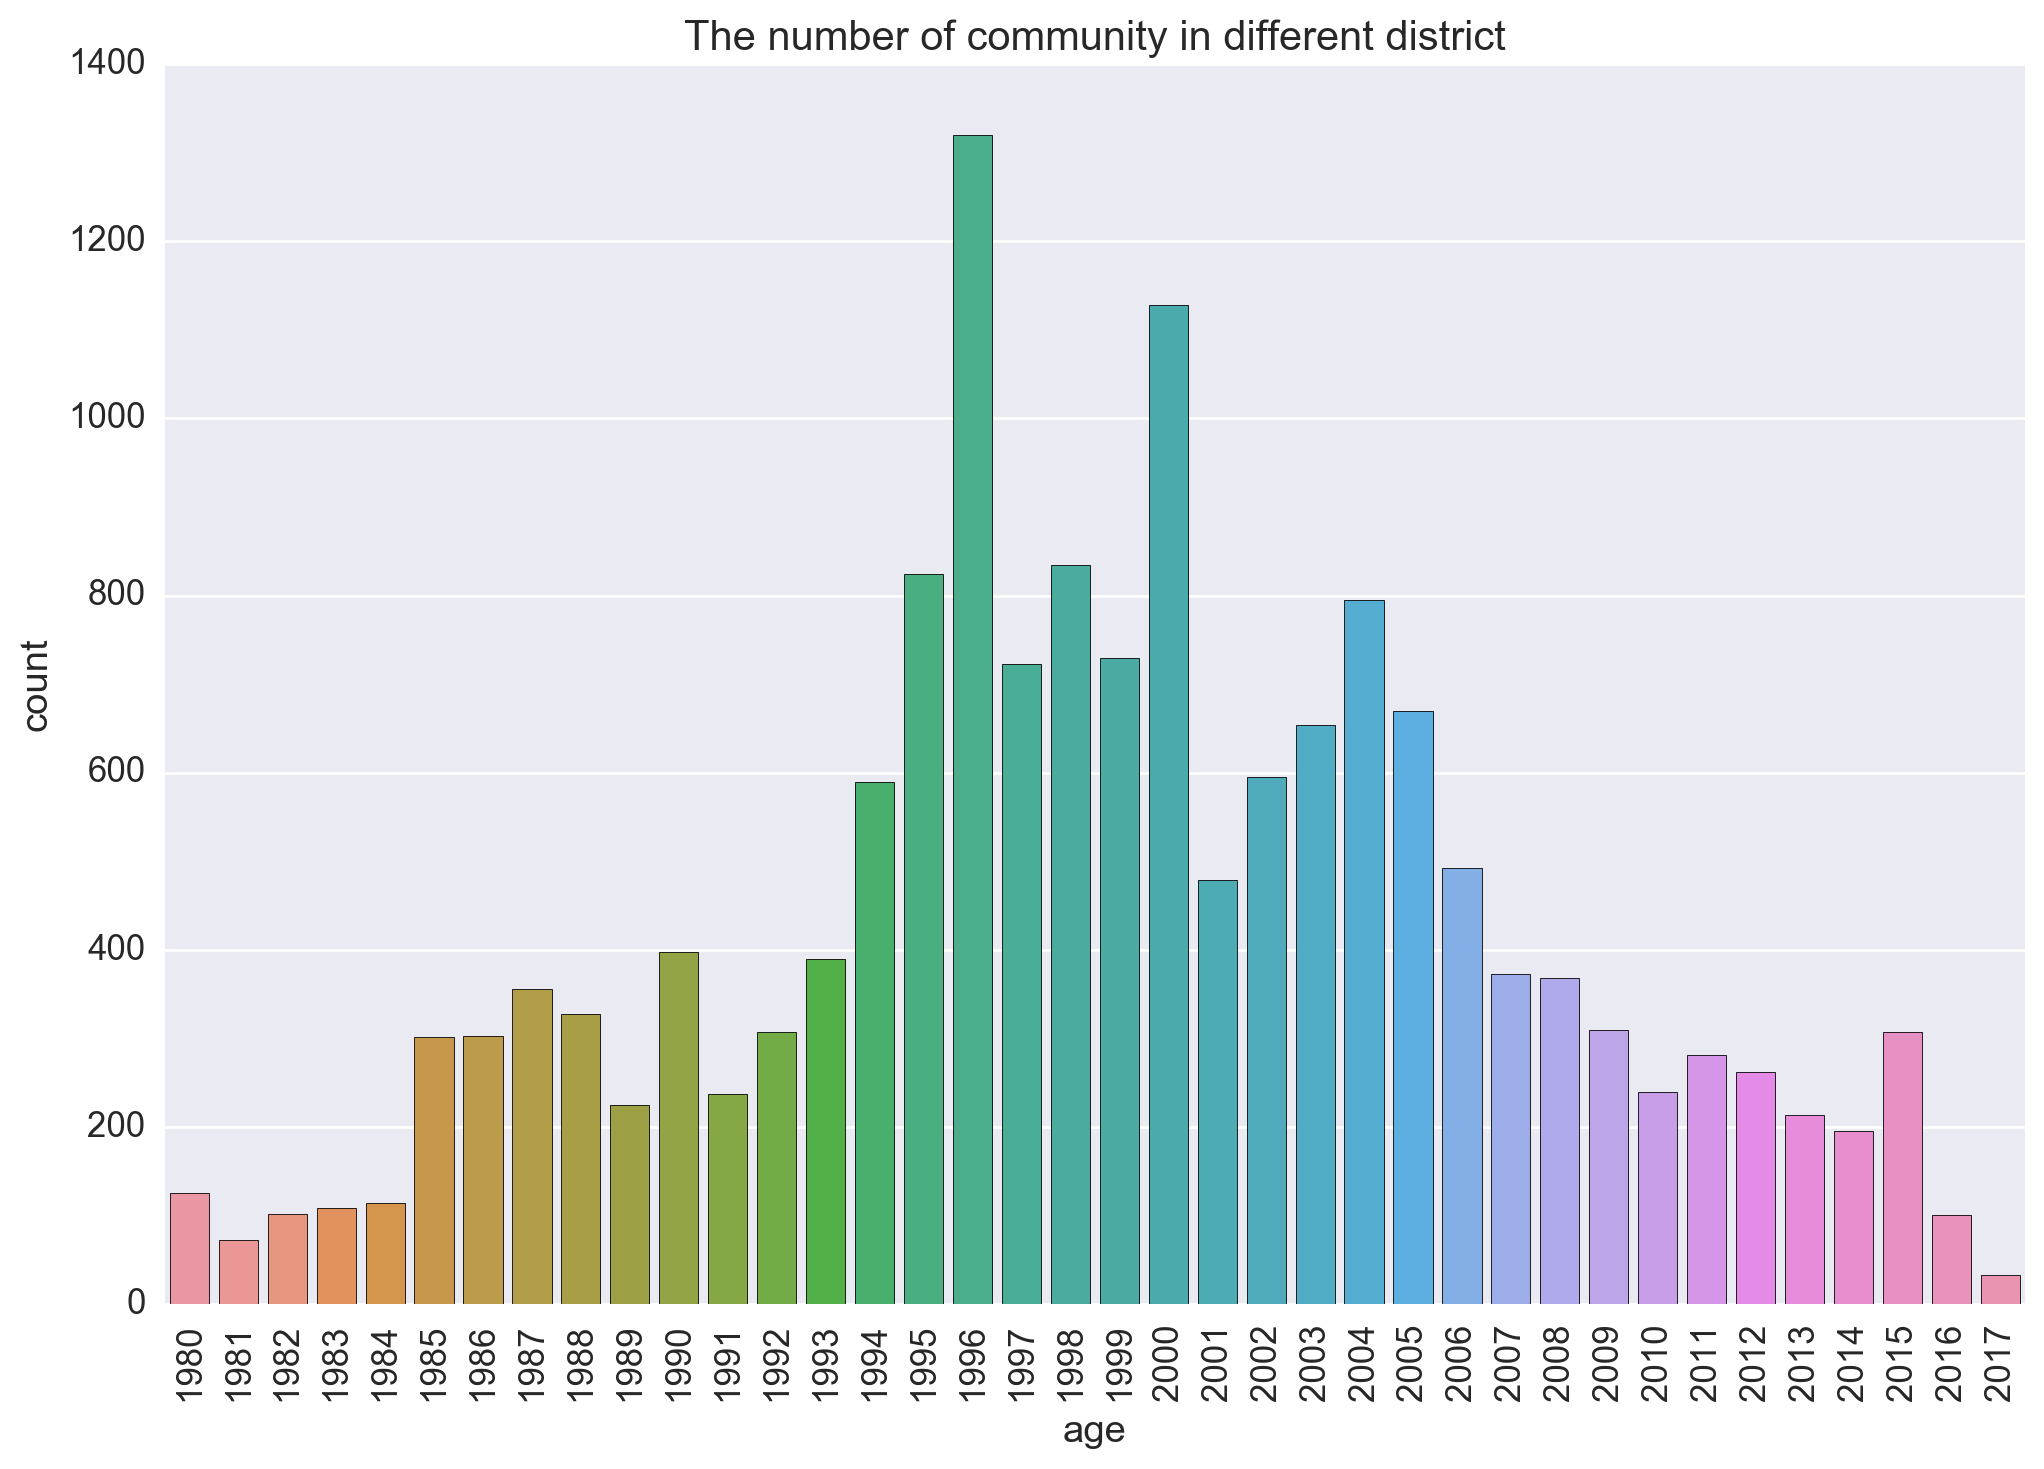

In [97]:
df5['age'] = df5['age'].astype(np.int64)
plt.figure(figsize=(12, 8))
sns.countplot(x='age', data=df5)
plt.xticks(rotation=90)
plt.title('The number of community in different district')

In [109]:
gf = df5.groupby(['age','district']).size()
gf.head()

age   district
1980  卢湾           6
      宝山           1
      徐汇          24
      普陀           4
      杨浦          14
dtype: int64

In [128]:
age_df = pd.concat([gf[:,'浦东'],gf[:,'闵行'],gf[:,'长宁'],gf[:,'静安'],gf[:,'松江'],gf[:,'徐汇'],gf[:,'杨浦'],gf[:,'卢湾'],gf[:,'普陀'],
                   gf[:,'闸北'],gf[:,'宝山'],gf[:,'嘉定'],gf[:,'虹口'],gf[:,'奉贤'],gf[:,'黄浦'],gf[:,'青浦'],
                   gf[:,'崇明'],gf[:,'金山']], axis=1, keys=df5['district'].unique())
age_df.fillna(0, inplace=True)
age_df.head()

,浦东,闵行,长宁,静安,松江,徐汇,杨浦,卢湾,普陀,闸北,宝山,嘉定,虹口,奉贤,黄浦,青浦,崇明,金山
age,,,,,,,,,,,,,,,,,,
1980,17,4.0,13.0,6.0,6.0,24,14.0,6.0,4.0,7.0,1.0,0.0,14.0,0.0,6.0,0.0,0.0,3.0
1981,7,0.0,8.0,5.0,0.0,21,12.0,3.0,4.0,0.0,0.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0
1982,5,3.0,19.0,6.0,0.0,22,11.0,1.0,7.0,3.0,3.0,0.0,18.0,0.0,4.0,0.0,0.0,0.0
1983,7,1.0,15.0,9.0,0.0,20,15.0,4.0,6.0,14.0,2.0,0.0,5.0,0.0,10.0,0.0,0.0,1.0
1984,13,9.0,18.0,5.0,0.0,26,7.0,10.0,8.0,3.0,1.0,0.0,6.0,0.0,8.0,0.0,0.0,0.0


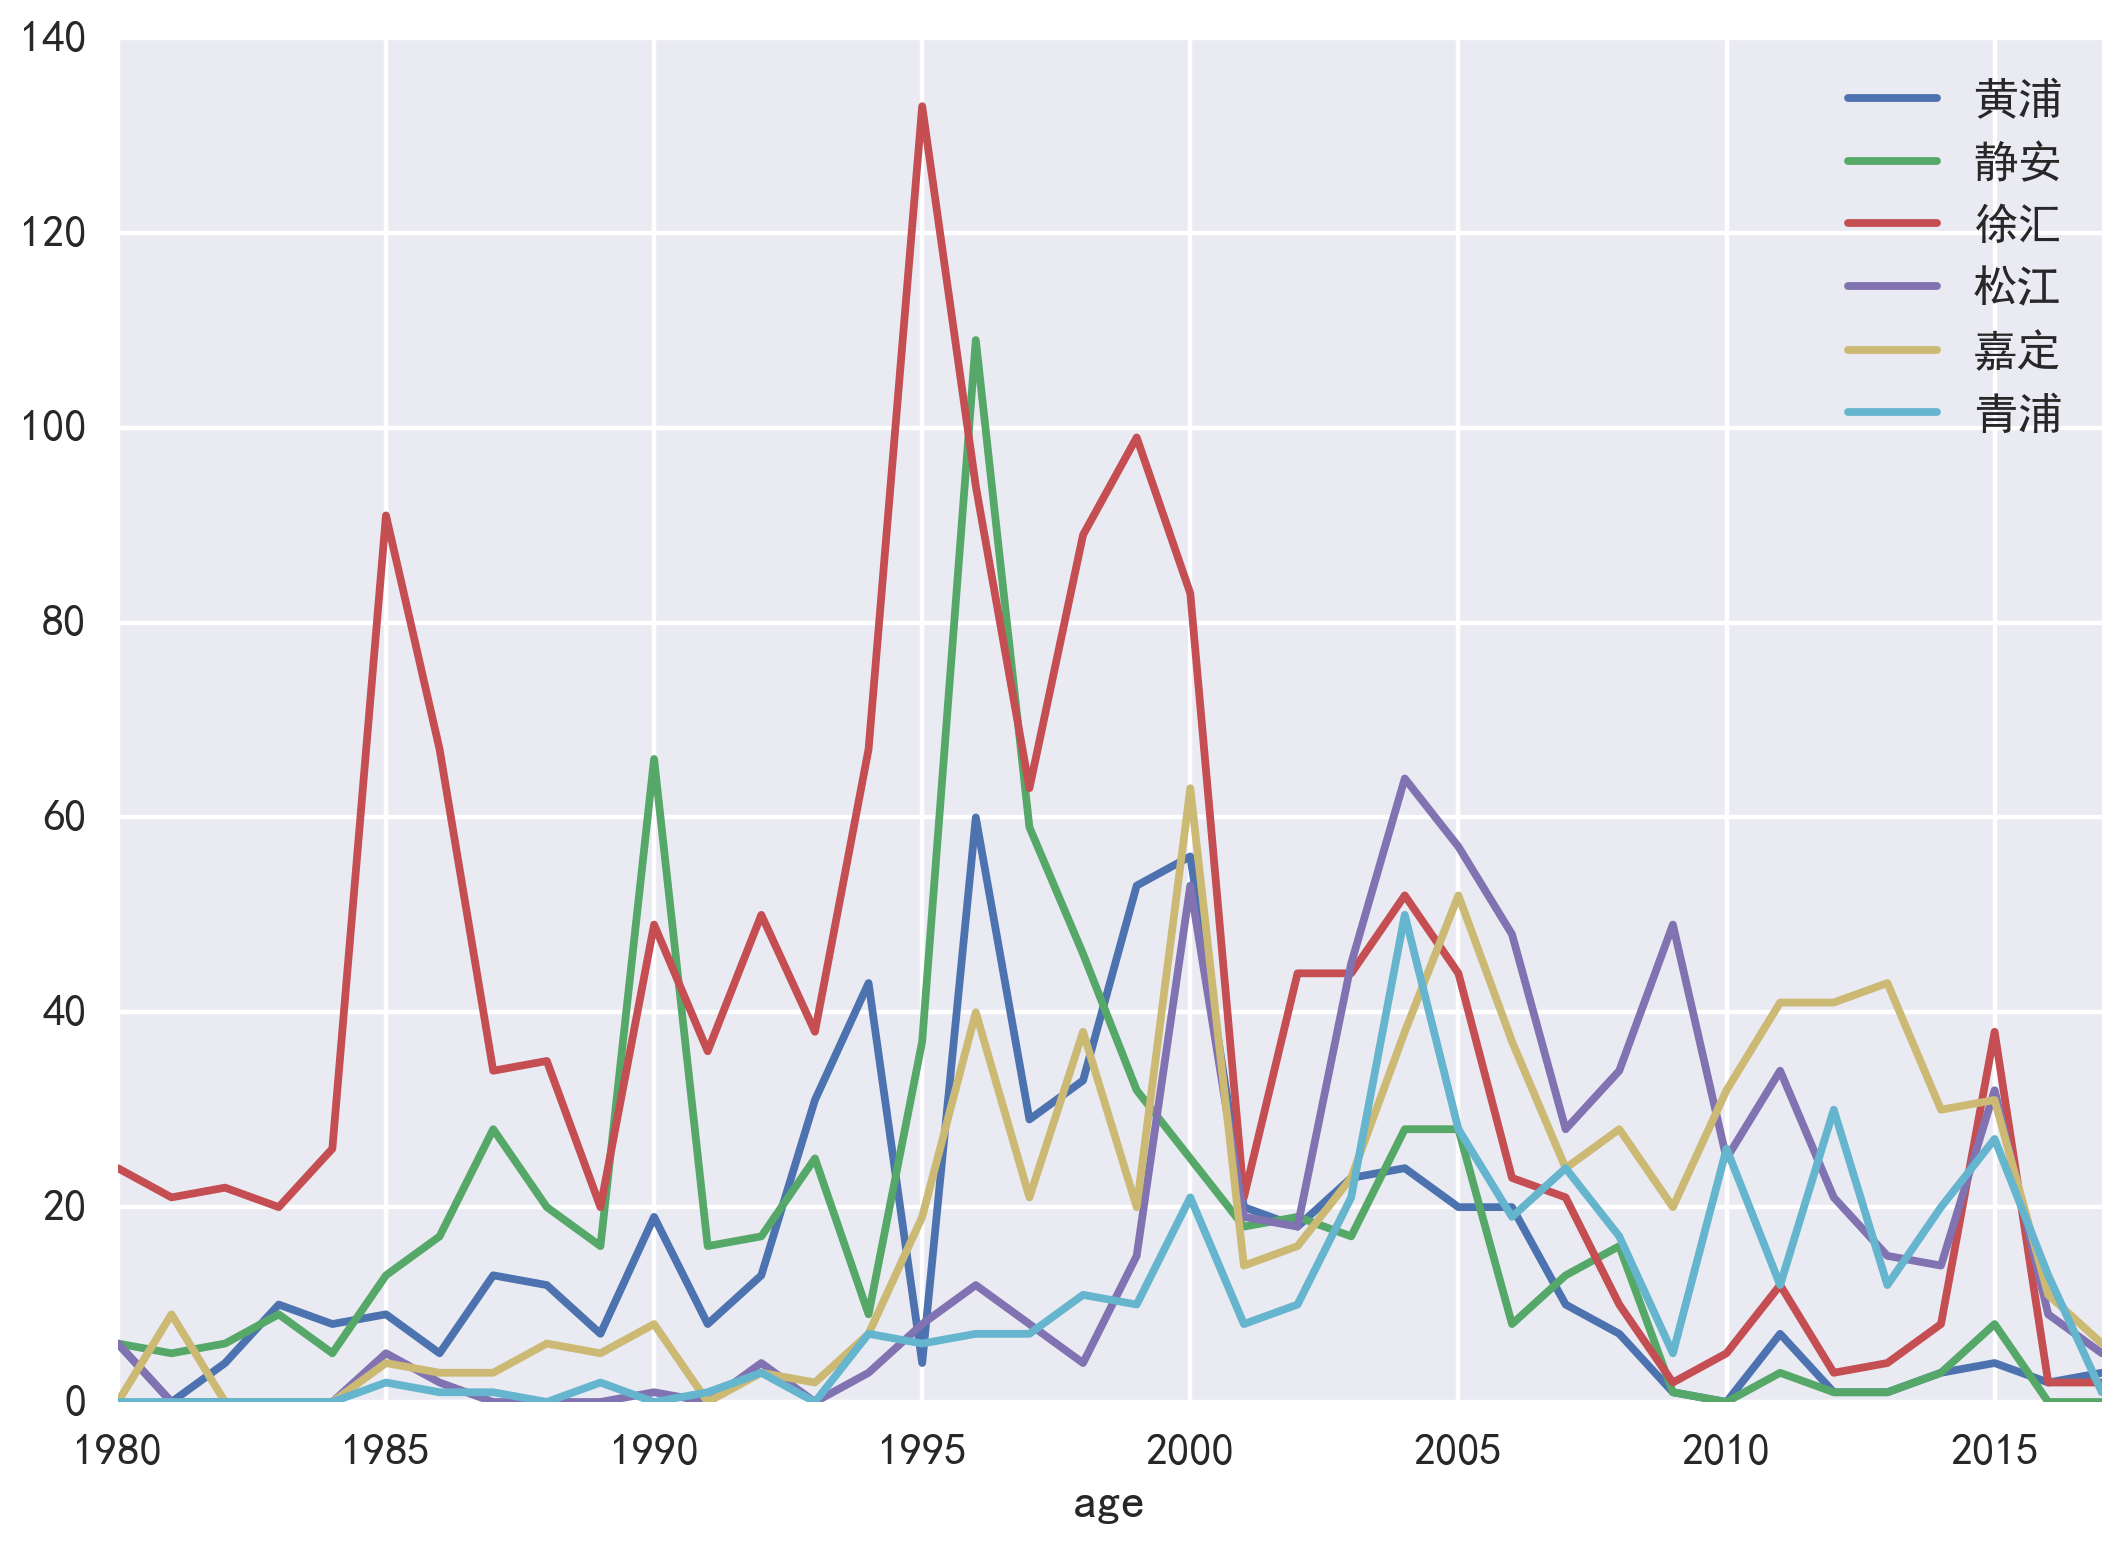

In [145]:
plt.figure(figsize=(8, 6))
sns.set_context('poster')
age_df[['黄浦','静安', '徐汇', '松江', '嘉定', '青浦']].plot()

In [155]:
df5.to_csv('anjuke_community_process3.csv', index=False)

# Model

In [147]:
# split train data and label
predictors = ['township', 'age', 'property_type', 'property_fee', 'volume_rate', 'total_houses',
              'green_rate','greet', 'comfort', 'traffic_score', 'hospital_score', 'school_score', 'commerce_score']
train = df5[predictors]
labels = df5['average_price']

In [149]:
from sklearn.feature_extraction import DictVectorizer
# vectorize
vec = DictVectorizer(sparse=False)
train = vec.fit_transform(train.to_dict(orient='record'))
print('样本维度：', train.shape)
train

样本维度： (15886, 205)


array([[  1.99600000e+03,   7.00000000e+00,   5.00000000e+00, ...,
          0.00000000e+00,   5.00000000e+00,   1.40000000e+00],
       [  1.99700000e+03,   6.00000000e+00,   7.00000000e+00, ...,
          0.00000000e+00,   9.00000000e+00,   2.00000000e+00],
       [  1.99600000e+03,   8.00000000e+00,   1.00000000e+01, ...,
          0.00000000e+00,   6.00000000e+00,   1.79000000e+00],
       ..., 
       [  2.01500000e+03,   1.00000000e+01,   6.00000000e+00, ...,
          0.00000000e+00,   4.00000000e+00,   1.80000000e+00],
       [  2.01000000e+03,   1.00000000e+01,   7.00000000e+00, ...,
          0.00000000e+00,   4.00000000e+00,   2.00000000e+00],
       [  2.00500000e+03,   6.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.20000000e+00]])

In [150]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [154]:
# 检测预测准确度的函数
def mean_absolute_percentage_error(y_true, y_pred):
    # convert pd.series to numpy.ndarray
    y_true = y_true.as_matrix()

    dim = y_true.shape
    mape = np.abs((y_true - y_pred) / y_true).sum() / float(dim[0])
    return mape

score_func = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

In [156]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.25, random_state=42)
# model = GradientBoostingRegressor(n_estimators=300)
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('The value of R-squared is:', r2_score(y_test, y_predict))
print('The mean squared error is:', mean_squared_error(y_test, y_predict))
print('The mean absolute error is:', mean_absolute_error(y_test, y_predict))

error = mean_absolute_percentage_error(y_test, y_predict)
print('predict error mean_absolute_percentage_error %f' % (error))

The value of R-squared is: 0.648720585169
The mean squared error is: 188056033.546
The mean absolute error is: 9174.42823667
predict error mean_absolute_percentage_error 0.186045


In [157]:
from sklearn import ensemble, tree, linear_model
from sklearn.metrics import r2_score, mean_squared_error
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)
    
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(
    X_train, y_train)
train_test(ENSTest, X_train, X_test, y_train, y_test)

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.5623523862072717
RMSE: 12983.095018315364
Test
R2: 0.4973770132991865
RMSE: 13713.290061778845


In [160]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(X_train, y_train)
train_test(GBest, X_train, X_test, y_train, y_test)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.05,
             loss='huber', max_depth=3, max_features='sqrt',
             max_leaf_nodes=None, min_samples_leaf=15,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=3000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
R2: 0.5983403711971221
RMSE: 12240.827368112079
Test
R2: 0.46107117327817015
RMSE: 13893.470762855759
